In [1]:
from Model.Energy import VonMisesFischerEnergy
from Model.Proposal import VonMisesFischerProposal
from Data import get_dataloader_from_data
from Model.Energy.utils import get_cartesian_from_polar, get_polar_from_cartesian
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from Model.Trainer import SNLTrainer
from Model.Energy.utils import get_cartesian_from_polar, get_polar_from_cartesian

# Plot sphere in 3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

/opt/miniconda3/envs/lime_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Target Distribution 

In [2]:
mu = torch.tensor([1, -1, -1], dtype=torch.float32)
kappa = torch.tensor([10.], dtype=torch.float32)
mu = mu / torch.norm(mu)
print("Target mu", mu)
target_distribution = VonMisesFischerProposal(input_size=torch.Size([3,]), mu = mu ,kappa = kappa)

Target mu tensor([ 0.5774, -0.5774, -0.5774])
Init Standard Gaussian...


In [3]:
sample_target_cartesian = target_distribution.sample(20000)

# sample_target_cartesian = torch.stack([torch.cos(sample_target_polar[...,0]),
#                                     torch.sin(sample_target_polar[...,0]) * torch.cos(sample_target_polar[...,1]),
#                                     torch.sin(sample_target_polar[...,0]) *torch.sin(sample_target_polar[...,1])
#                                     ], dim=1)

print(sample_target_cartesian.shape)

dataset_total = TensorDataset(sample_target_cartesian, )
data_train, data_val, data_test = torch.utils.data.random_split(dataset_total, [10000, 5000, 5000])
dataloader_train = DataLoader(data_train, batch_size=100, shuffle=True)
dataloader_val = DataLoader(data_val, batch_size=100, shuffle=False)

torch.Size([20000, 3])


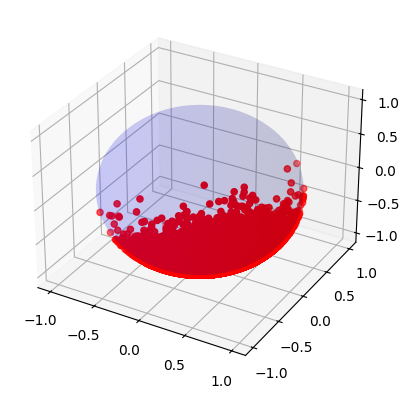

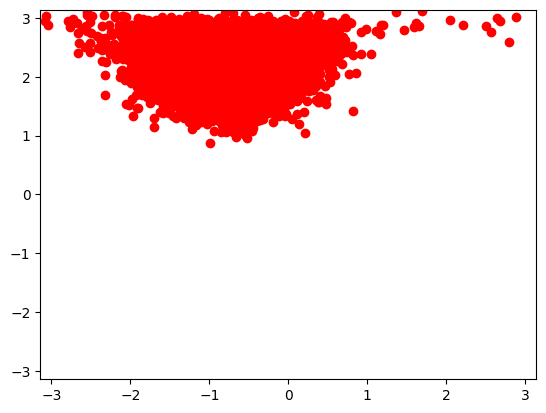

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.1)
# Add points
ax.scatter(*sample_target_cartesian.T, color='r')
plt.show()



sample_target_polar = get_polar_from_cartesian(sample_target_cartesian)
# Plot sphere polar projection
fig, ax = plt.subplots()
ax.scatter(sample_target_polar[...,0], sample_target_polar[...,1], color='r')
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.show()




# Proposal Distribution :

Init Standard Gaussian...


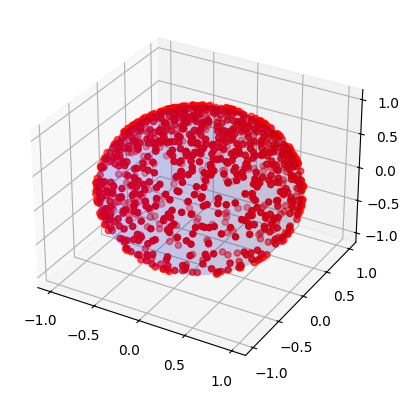

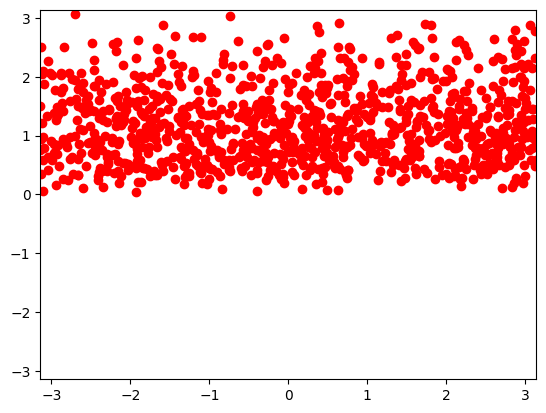

In [5]:
mu_prop = torch.tensor([0, 0, 1], dtype=torch.float32)
kappa_prop = torch.tensor([1.0], dtype=torch.float32)
proposal_distribution = VonMisesFischerProposal(input_size=torch.Size([3,]), mu = mu_prop ,kappa = kappa_prop)
sample_proposal_cartesian = proposal_distribution.sample(1000,)
sample_proposal_polar = get_polar_from_cartesian(sample_proposal_cartesian)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.1)

# Add points
ax.scatter(*sample_proposal_cartesian.T, color='r')
plt.show()

# Plot sphere polar projection
fig, ax = plt.subplots()
ax.scatter(sample_proposal_polar[...,0], sample_proposal_polar[...,1], color='r')
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.show()



# Energy

In [6]:
energy = VonMisesFischerEnergy(dim=2, learn_mu=True, learn_kappa=True)

In [7]:
energy(x = sample_target_cartesian)

tensor([-0.3625,  1.0779,  1.4405,  ...,  1.4469,  0.5081,  1.2956],
       grad_fn=<NegBackward0>)

# Trainer :


In [8]:
trainer = SNLTrainer(energy=energy, proposal=proposal_distribution, dataloader=dataloader_train, val_dataloader=dataloader_val , n_sample_train=1000, n_sample_test=1000, lr=0.01, )

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hugosenetaire. Use `wandb login --relogin` to force relogin


In [ ]:
trainer.train(n_iter=30000, n_iter_pretrain=1000,)

Step 0
Init Standard Gaussian...
Step 1000
Init Standard Gaussian...
Step 2000
Init Standard Gaussian...
Step 3000
Init Standard Gaussian...
Step 4000
Init Standard Gaussian...
Step 5000
Init Standard Gaussian...
Step 6000
Init Standard Gaussian...
Step 7000
Init Standard Gaussian...
Step 8000
Init Standard Gaussian...
Step 9000
Init Standard Gaussian...
Step 10000
Init Standard Gaussian...
